# MAP536: PYTHON FOR DATA SCIENCE
## LAB 2: PCA/SVD

## TABLE OF CONTENTS

* [IMPORTS](#IMPORTS)

* [EXERCISE 1 (Linear Algebra)](#EXERCISE-1-(Linear-Algebra)) 
    * [1.1](#1.1)
    * [1.2](#1.2)
* [EXERCISE 2 (Random Matrix Spectrum)](#EXERCISE-2-(Random-Matrix-Spectrum)) 
    * [2.3](#2.3)
    * [2.4](#2.4)
    * [2.5](#2.5)
* [EXERCISE 3 (Power Method)](#EXERCISE-3-(Power-Method)) 
    * [3.6](#3.6)
    * [3.7](#3.7)
    * [3.8](#3.8)
    * [3.9](#3.9)
    * [3.10](#3.10)
* [EXERCISE 4 (PCA)](#EXERCISE-4-(PCA)) 
    * [4.11](#4.11)
    * [4.12](#4.12)
    * [4.13](#4.13)
    * [4.14](#4.14)
    * [4.15](#4.15)
* [EXERCISE 5 (Analysis of the auto-mpg Dataset)](#EXERCISE-5-(Analysis-of-the-auto-mpg-Dataset)) 
    * [5.16](#5.16)
    * [5.17](#5.17)
    * [5.18](#5.18)
    * [5.19](#5.19)
    * [5.20](#5.20)
    * [5.21](#5.21)

## IMPORTS

In [1]:
from os import path
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

separator = '-'*100
np.set_printoptions(precision=6)

## EXERCISE 1 (Linear Algebra)
### 1.1

In [2]:
def check_equality(n, p, lmbda, tol, check) :
    
    # Generate X - Gaussian Distribution
    X = np.random.normal(0,np.sqrt(5), n*p)
    X = np.reshape(X,(n,p))

    # Generate Y - Uniform Distribution
    Y = np.random.uniform(-1, 1, n)
    Y = np.reshape(Y, (n,1))
 
    # LHS 
    start_L = time.time()
    
    I_n = np.eye(n)
    A = X @ X.T + lmbda * I_n
    A_inv = np.linalg.solve(A, I_n)
    LHS = X.T @ A_inv @ Y
    
    end_L = time.time()
    time_L = end_L - start_L
    
    # RHS 
    start_R = time.time()
    
    I_p = np.eye(p)
    B = X.T @ X + lmbda* I_p
    B_inv = np.linalg.solve(B, I_p)
    RHS = B_inv @ X.T @ Y
    
    end_R = time.time()
    time_R = end_R - start_R
    
    # EQUALITY CHECK
    if check == 'y':
        if np.allclose(LHS, RHS, atol=tol):
            print('LHS = RHS within tolerance ε =', tol)
        else: 
            print("LHS ≠ RHS within tolerance ε = ", tol) 
            
    return time_L, time_R

### 1.1 (a)

In [3]:
check_equality(n=100, p=2000, lmbda=10e-5, tol=1e-6, check='y')

LHS = RHS within tolerance ε = 1e-06


(0.010409116744995117, 0.5141491889953613)

### 1.1 (b)

In [4]:
check_equality(n=2000, p=100, lmbda=10e-5, tol=1e-7, check='y')

LHS = RHS within tolerance ε = 1e-07


(0.4510810375213623, 0.0016293525695800781)

## 1.2

In [5]:
# Compute time according to size of n and p 
df = pd.DataFrame(columns = ['n', 'p', 'Time_difference'])
i=0
for n in range(100,1000,100):
    for p in range(100,1000,100):
        time_L, time_R = check_equality(n, p, 10e-5, tol=1e-7, check='n')
        
        z = time_L - time_R
        
        df.loc[i]=[n, p, z]
        i+=1

Text(0.5, 0, ' Time')

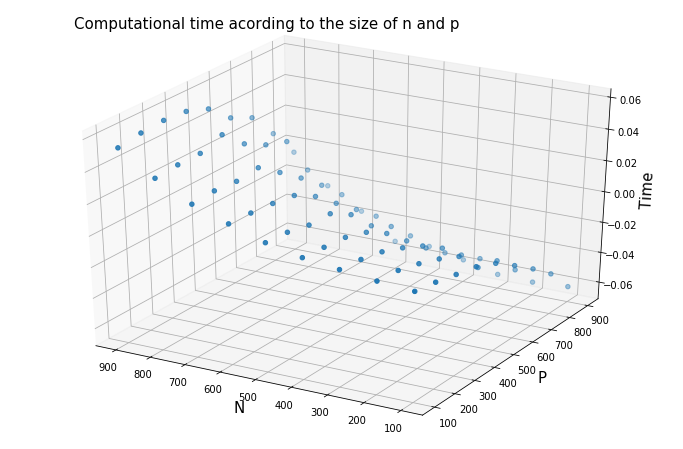

In [6]:
# 3D graph representing the computational time of both sides of the equation according to size of n and p 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['n'], df['p'], (df['Time_difference']))
ax.invert_xaxis()


ax.text2D(0.1, 0.95, "Computational time acording to the size of n and p ", transform=ax.transAxes, fontsize=15)
ax.set_xlabel('N', fontsize=15)
ax.set_ylabel('P', fontsize=15)
ax.set_zlabel(' Time', fontsize=15)

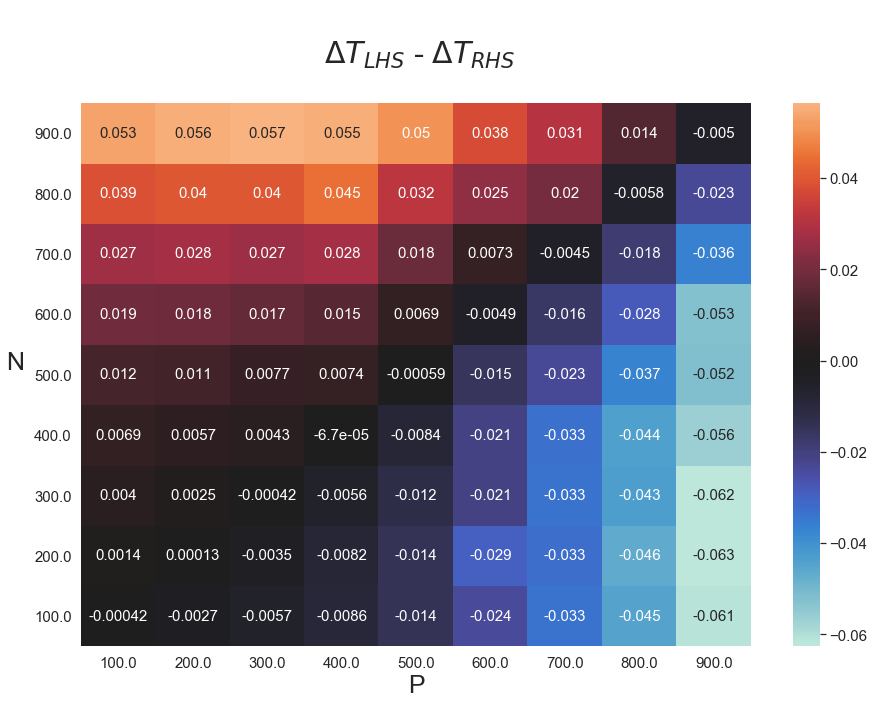

In [7]:
# Heatmap representing the difference in computation time between both sides w.r.t. n and p 
plt.figure(figsize = (15,10))

heatmap_data = pd.pivot_table(df, values='Time_difference', index='n', columns='p')
 
sns.set(rc={'font.size': 15, 'axes.labelsize': 25,'xtick.labelsize': 15, 'ytick.labelsize': 15})

  
fig_1 = sns.heatmap(heatmap_data, center=0, annot=True, annot_kws={"size": 15})
fig_1.set_title('\n $\Delta T_{LHS}$ - $\Delta T_{RHS}$\n', fontsize = 30)
fig_1.invert_yaxis()
plt.xlabel('P',rotation=0)
plt.ylabel('N'+'    ',rotation=0)
plt.yticks(rotation = 0)


plt.show()

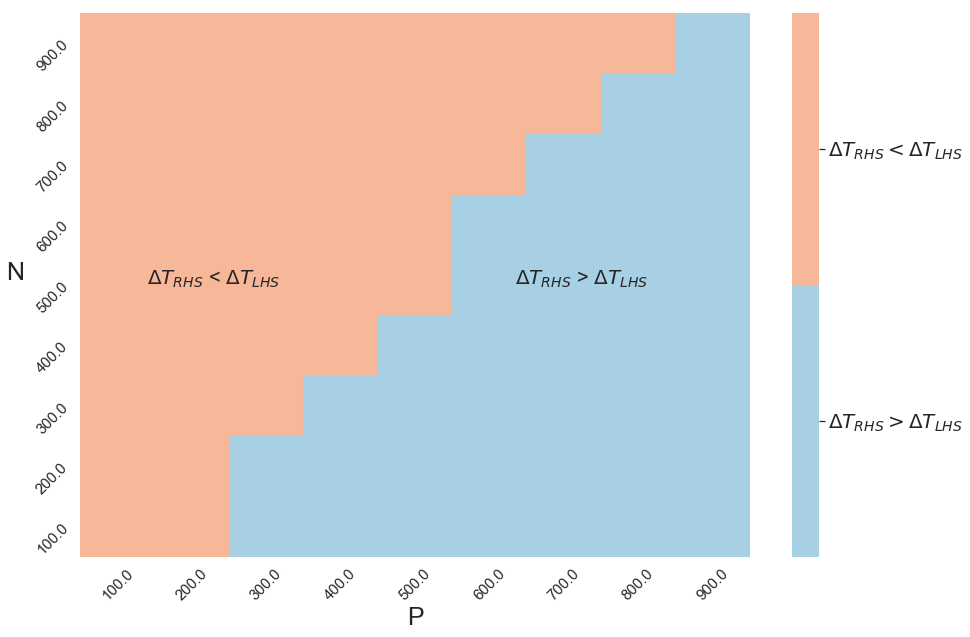

In [8]:
# Clearer representation of when computing LHS is longer or shorter than computer RHS
L_greater_R = (df['Time_difference']>0).replace(True, 1).replace(False,0)
df['L_greater_R'] = L_greater_R

plt.figure(figsize=(15,10))


value_to_int = [0, 1]
n = len(value_to_int)     


cmap = sns.color_palette("RdBu_r", n) 
ax = sns.heatmap(heatmap_data, cmap=cmap) 
ax.invert_yaxis()

plt.xlabel('P',rotation=0)
plt.ylabel('N'+'    ',rotation=0)
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)

colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 

colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
value_to_int = ['$ \Delta T_{RHS} > \Delta T_{LHS} $','$ \Delta T_{RHS} < \Delta T_{LHS}$']
colorbar.set_ticklabels(value_to_int)
colorbar.ax.tick_params(labelsize=20) 

ax.text(0.1, 0.5, '$\Delta T_{RHS}$ < $\Delta T_{LHS}$ ', fontsize = 20, transform=ax.transAxes)
ax.text(0.65, 0.5, '$\Delta T_{RHS}$ > $\Delta T_{LHS}$ ', fontsize = 20, transform=ax.transAxes)
plt.show()

## EXERCISE 2 (Random Matrix Spectrum)

## 2.3

In [9]:
def generate_matrix_distrib(n, p, str_dist):
    if str_dist is 'uniform':
        return np.reshape(np.random.uniform(-np.sqrt(6), np.sqrt(6), n*p), (n,p))
    elif str_dist is 'laplace':
        return np.reshape(np.random.laplace(0, 1, n*p), (n,p))
    elif str_dist is 'standard_t':
        return np.reshape(np.random.standard_t(4, n*p), (n,p))

## 2.4

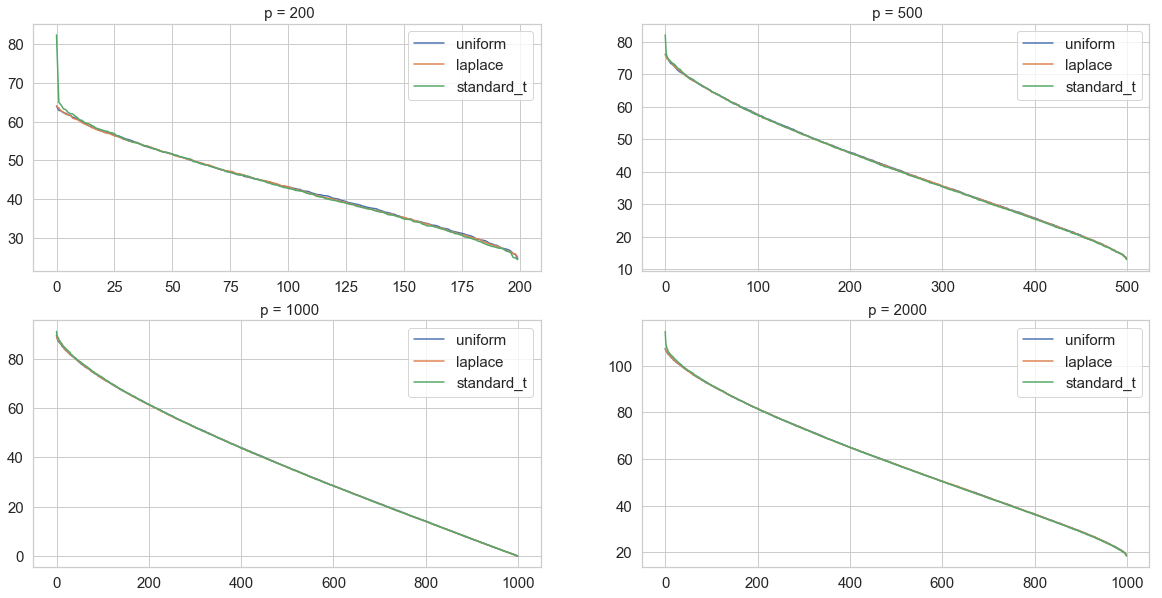

In [10]:
plt.figure(figsize = (20,10))
i = 1
n = 1000
for p in [200, 500, 1000, 2000]:
    sns.set_style("whitegrid")
    plt.subplot(2,2,i)
    plt.title(' p = ' + str(p), fontsize=15)
    i += 1
    for dist in ['uniform','laplace','standard_t']:
        [a,b,c] = np.linalg.svd(generate_matrix_distrib(n,p,dist))
        plt.plot(b, label=dist)
        sns.set_style("whitegrid")
        plt.legend(fontsize = 15)

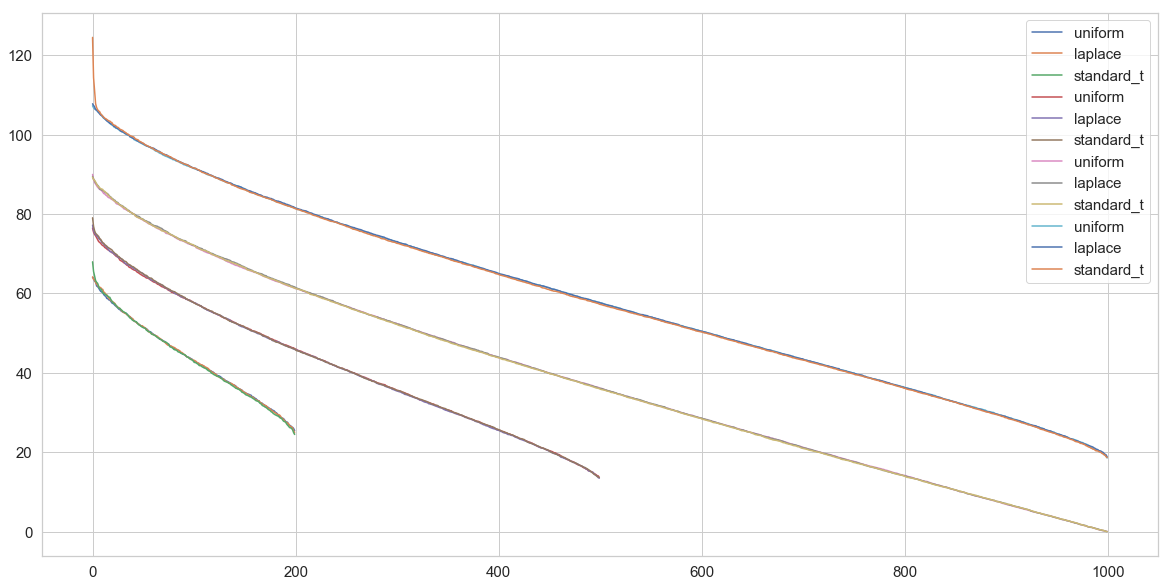

In [11]:
plt.figure(figsize = (20,10))
i = 1
n = 1000
for p in [200, 500, 1000, 2000]:
    i += 1
    for dist in ['uniform','laplace','standard_t']:
        [a,b,c] = np.linalg.svd(generate_matrix_distrib(n,p,dist))
        plt.plot(b, label=dist)
        sns.set_style("whitegrid")
        plt.legend(fontsize = 15)

## 2.5

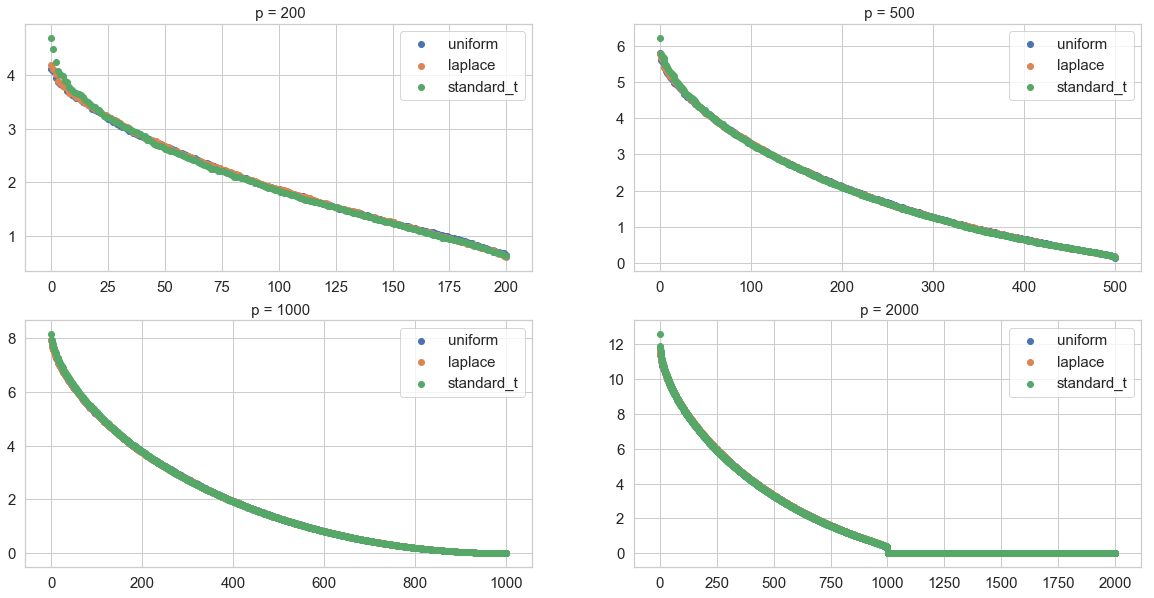

In [12]:
plt.figure(figsize = (20,10))
i = 1
n = 1000
for p in [200, 500, 1000, 2000]:
    plt.subplot(2,2,i)
    plt.title(' p = ' + str(p), fontsize=15)
    i += 1
    for dist in ['uniform','laplace','standard_t']:
        X = generate_matrix_distrib(n,p,dist)
        L = np.linalg.eigvalsh((X.T@X)/n)[::-1]
        plt.scatter(np.linspace(0,len(L),len(L)).T,L, label=dist)
        sns.set_style("whitegrid")
        plt.legend(fontsize = 15)

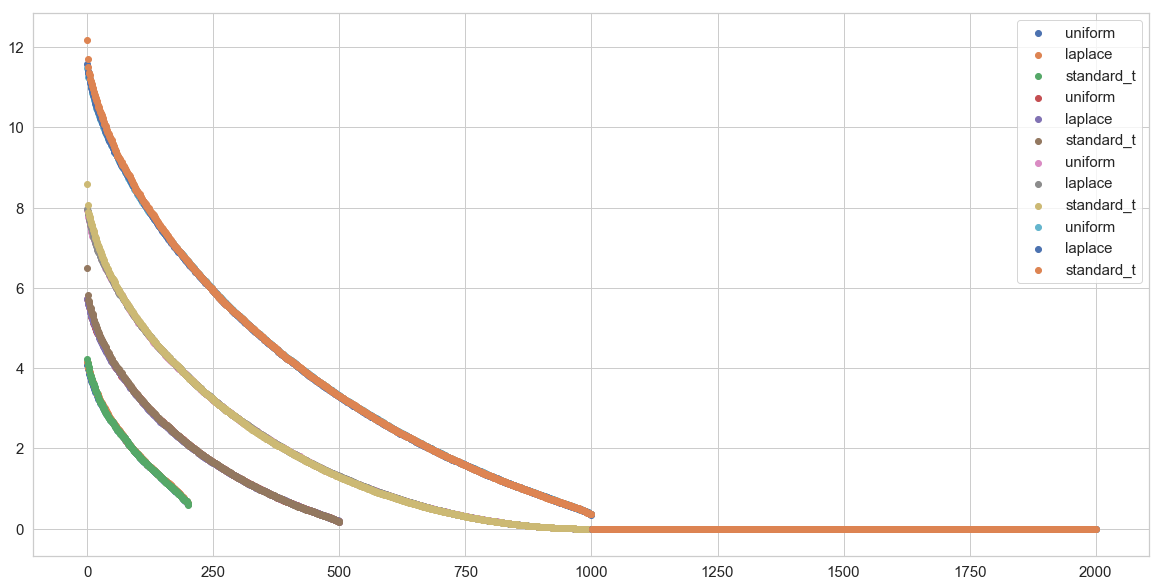

In [13]:
plt.figure(figsize = (20,10))
i = 1
n = 1000
for p in [200, 500, 1000, 2000]:

    i += 1
    for dist in ['uniform','laplace','standard_t']:
        X = generate_matrix_distrib(n,p,dist)
        L = np.linalg.eigvalsh((X.T@X)/n)[::-1]
        sns.set_style("whitegrid")
        plt.scatter(np.linspace(0,len(L),len(L)).T,L, label=dist)
        plt.legend(fontsize = 15)


if expectation of Mij = 0 and var Mij. 1 and Mij are iid we get the same eigenvalue no matter what the law is.

## EXERCISE 3 (Power Method)

## 3.6

In [14]:
def power_method(X, u, v, n_step):
    eps = 1e-15
    n_step_completed = 0
    u_conv = 0
    v_conv = 0
    df_pm = pd.DataFrame(columns = ['u','v'])
    
    n = int(u.shape[0])
    p = int(v.shape[0])
    
    u_res = np.zeros((n,n_step))
    
    input_valid = (X.shape == u.shape[0] , v.shape[0])
    if input_valid:
            for n_step_completed in range (0, n_step-1):
                u_old,v_old = u, v
                
                u,v = X@v , X.T@u
                
                u = u/np.linalg.norm(u)
                v = v/np.linalg.norm(v)
                
                df_pm.loc[n_step_completed] = [u, v]


                if np.linalg.norm(u-u_old) < eps:
                    u_conv += 1
                if np.linalg.norm(v-v_old) < eps:
                    v_conv += 1
                if u_conv == 5 and v_conv == 5:
                    print(f'Process completed in n={n_step_completed} steps',)
                    break
                
    elif not input_valid:
        print('Invalid input: Check that X(n,p) u(n,1) v(p,1)')
        
    return df_pm, n_step_completed

## 3.7

In [15]:
# INPUTS
# MAX NUMBER OF POWER METHOD ITERATION
n_step = 1000  
n = 100
p = 200

X = np.random.uniform(0,5,(n,p))

# FIRST INITIALIZING SET
u_1 = np.random.uniform(1,10, n)
v_1 = np.random.uniform(1,10, p)

# SECOND INITIALIZING SET
u_2 = u_1
v_2 = -v_1

Process completed in n=18 steps


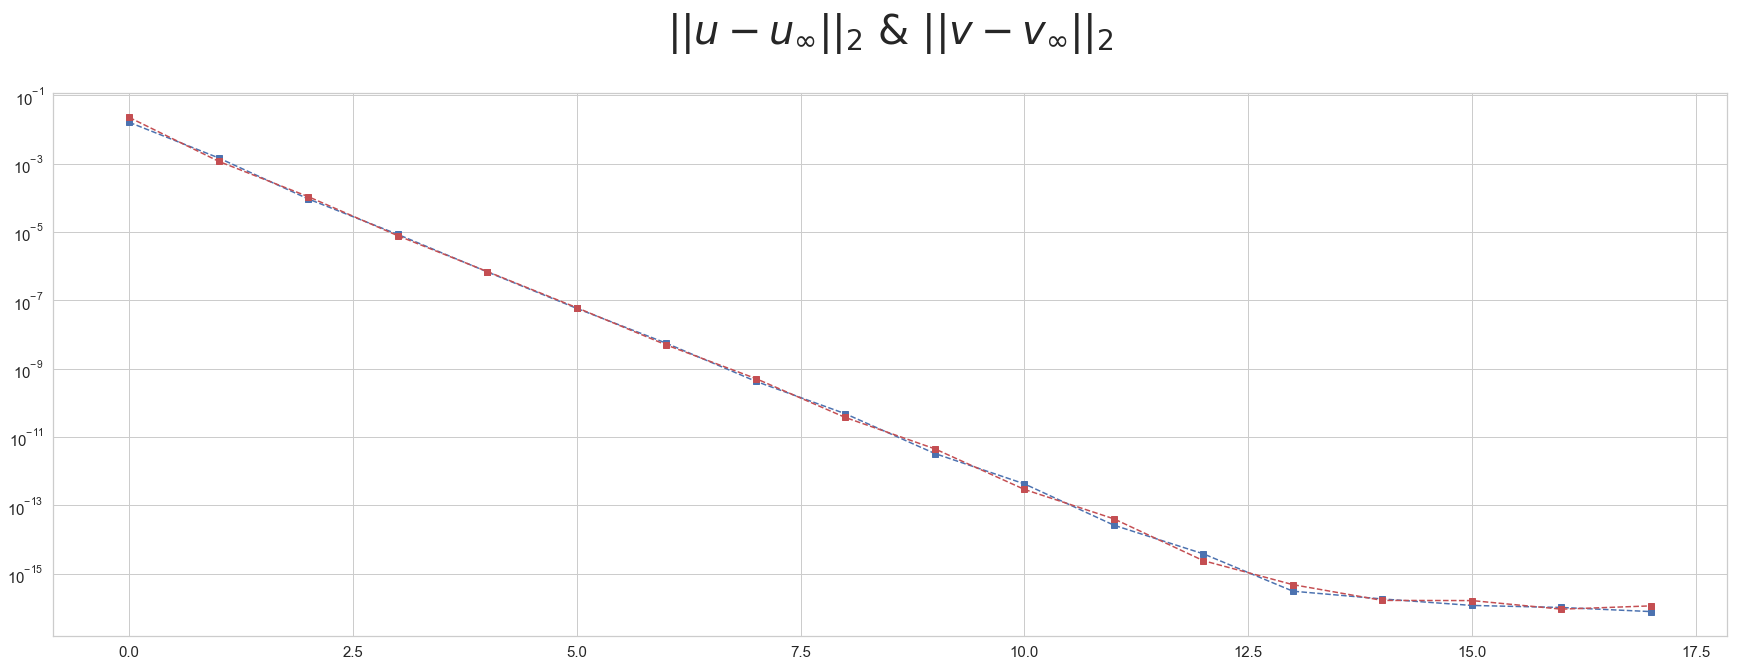

In [16]:
df_pm_init1,n_step_completed = power_method(X,u_1,v_1,n_step)

# COMPUTE NORM(U_n - U_last), NORM(V_n - V_last) AT EACH N

#u_res = df_pm_init1.iloc[:-1,0] - df_pm_init1.iloc[-1,0]
u_res = df_pm_init1.iloc[:-1,0].apply(lambda x : np.linalg.norm(x - df_pm_init1.iloc[-1,0]))

#v_res = df_pm_init1.iloc[:-1,1]-df_pm_init1.iloc[-1,1]
v_res = df_pm_init1.iloc[:-1,1].apply(lambda x : np.linalg.norm(x - df_pm_init1.iloc[-1,1]))
v_res = v_res.apply(lambda x: np.linalg.norm(x))

sns.set_style("whitegrid")
fig_4 = plt.figure(figsize = (30,10))
fig_4 = plt.semilogy(u_res,'bs--')
fig_4 = plt.semilogy(v_res,'rs--')
fig_4 = plt.title('$||u - u_{\infty}||_2 \ &\ ||v - v_{ \infty}||_2$\n', fontsize = 40)

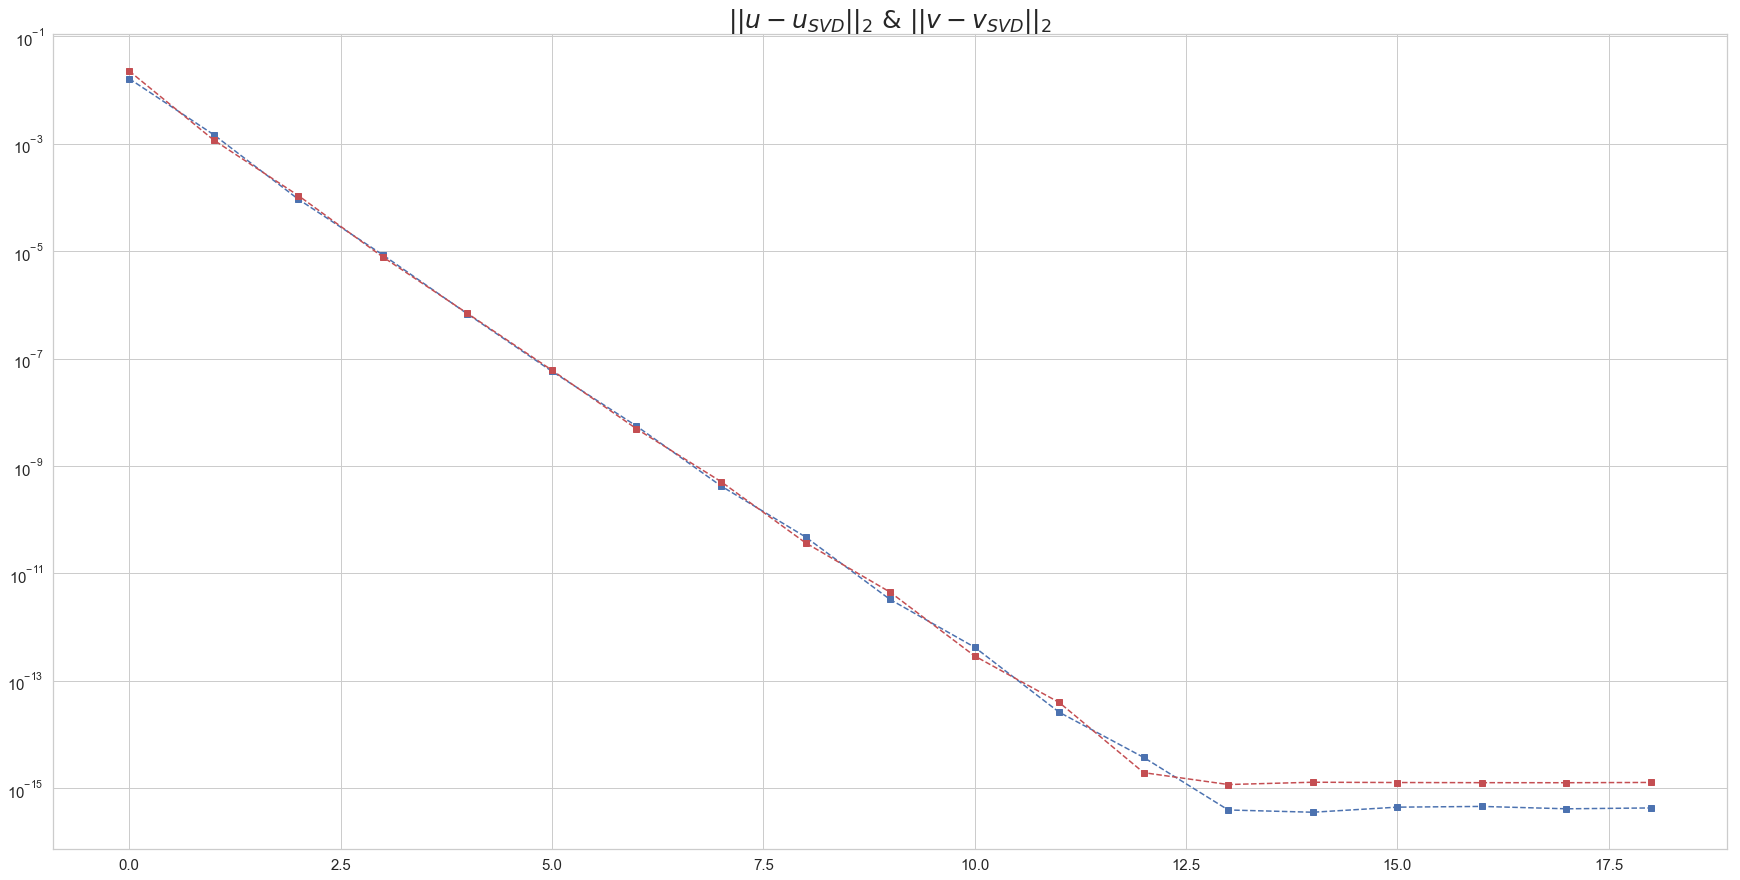

In [17]:
# SHOW CONVERGENCE TO SINGULAR VECTOR ASSOCIATED WITH LARGEST (IN MAGNITUDE) SINGULAR VALUE
U, S, V = np.linalg.svd(X)
u_svd = U[: , 0]

v_svd = V[0 , :]

# The power method may converge to u,v ± u_svd,v_svd.
# For robustness, we check if u_pm = ± u_svd and v_pm = ±v_svd

u_res_svd = df_pm_init1.iloc[:,0].apply(lambda x: np.minimum(np.linalg.norm(x + u_svd) , 
                                                             np.linalg.norm(x - u_svd)))
v_res_svd = df_pm_init1.iloc[:,1].apply(lambda x: np.minimum(np.linalg.norm(x + v_svd) , 
                                                             np.linalg.norm(x - v_svd)))
fig_5 = plt.figure(figsize = (30,15))
fig_5 = plt.semilogy(u_res_svd,'bs--')
fig_5 = plt.semilogy(v_res_svd,'rs--')
fig_5 = plt.title('$||u - u_{SVD}||_2 \ &\ ||v - v_{SVD}||_2$', fontsize = 25)

## 3.8

In [18]:
# Get singular vectors from first initializing set
u_init1 = df_pm_init1.iloc[-1,0]
v_init1 = df_pm_init1.iloc[-1,1]
#
# Get singular vectors from second initializing set
df_pm_init2 , n_step_completed = power_method(X,u_2,v_2,n_step)
#
u_init2 = df_pm_init2.iloc[-1,0]
v_init2 = df_pm_init2.iloc[-1,1]
#
print('Initializing sets yield the same u:', np.allclose(u_init1,u_init2))
print('Initializing sets yield opposite u\'s:', np.allclose(u_init1, - u_init2))
print(separator)
print('Initializing sets yield the same v:', np.allclose(v_init1,v_init2))
print('Initializing sets yield opposite v\'s:', np.allclose(v_init1, - v_init2))

Initializing sets yield the same u: False
Initializing sets yield opposite u's: True
----------------------------------------------------------------------------------------------------
Initializing sets yield the same v: True
Initializing sets yield opposite v's: False


 We observe the sign of the intializing set determinates the sign of the output, i.e. if the initialization vector $u_2 = -u_1$, the output will be $u_{out,2} = -u_{out,1}$ <br> Note: Same goes for the right singular vectors)

## 3.9

$ X = \sum_{n=0}^{n}  \sigma_{i} u_{i} v_{i}^T$

$\Rightarrow X . v_{1}^T$ =  $\sigma_{1} u_{1} v_{1}^T v_{1}^T$   , by othogonality of $v_{i}'s$  and  $u_{i}'s$  
   
$\Leftrightarrow X . v_{1}^T = \sigma_{1} u_{1}$ ,  by orthonormality of $v_{i}'s$
   
$\Leftrightarrow || X . v_{1}^T || = || \sigma_{1} u_{1} || $
   
$\Leftrightarrow || X . v_{1}^T || =  \sigma_{1}  $  , largest singular value of X

In [19]:
print('Largest Singular Value from SVD decomposition:', S[0])
print('Second largest Singular Value from SVD decomposition:', S[1])

Largest Singular Value from SVD decomposition: 353.63114018383004
Second largest Singular Value from SVD decomposition: 34.61813369197039


In [20]:
s1 = np.linalg.norm(X @ v_init1.T)
print('Largest singular value s1 obtained by the Power Method:', s1)

Largest singular value s1 obtained by the Power Method: 353.63114018383


## 3.10

To find the second largest singular value, we compute the largest singular value of the matrix  $X_{s2} = X - \sigma_{1}  u_{1} v_{1}^T v_{1}$ <br> Using the powermethod

In [21]:
X_s2 = X - np.linalg.norm(X @ v_init1.T) * u_init1.reshape(-1,1) @ v_init1.reshape(-1,1).T
df_pm_s2 , n_step_completed = power_method(X_s2,u_1,v_1,n_step)

In [22]:
v_s2 = df_pm_s2.iloc[-1,1]
s2 = np.linalg.norm(X @ v_s2.T)
print('Second largest singular value s1 obtained by the Power Method:', s2)

Second largest singular value s1 obtained by the Power Method: 34.618133691970336


## EXERCISE 4 (PCA)

## 4.11

In [23]:
import urllib

defra = pd.read_csv('defra_consumption.csv', sep=';', index_col=0)

defra.head()

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209


## 4.12

In [24]:
# Standardize dataset
from sklearn.preprocessing import StandardScaler
x_scaled = pd.DataFrame(StandardScaler().fit_transform(defra.astype(float)), index = defra.index, columns = defra.columns)
x_scaled.head()

,England,Wales,Scotland,N Ireland
Cheese,-0.830281,-0.890961,-0.784142,-0.781715
Carcass meat,-0.511509,-0.615412,-0.479033,-0.349984
Other meat,0.490347,0.664561,0.636042,0.335201
Fish,-0.734650,-0.764297,-0.742436,-0.723721
Fats and oils,-0.629910,-0.597634,-0.606344,-0.474563


## 4.13

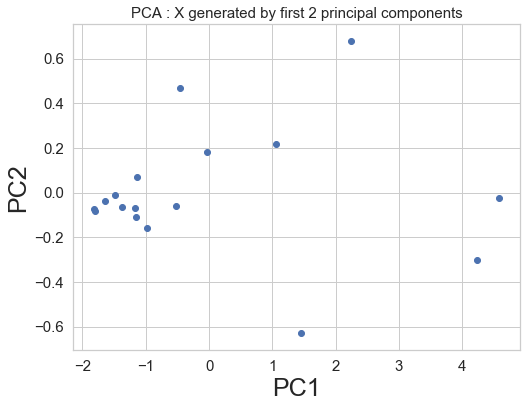

In [25]:
from sklearn.decomposition import PCA 

pca_1 = PCA(n_components=2).fit(x_scaled)

X_pca_1 = pca_1.transform(x_scaled)

X_inverse_1 = pca_1.inverse_transform(X_pca_1)


plt.figure(figsize=(8,6))

plt.scatter(X_pca_1[:, 0], X_pca_1[:, 1])

plt.title('PCA : X generated by first 2 principal components', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 4.14

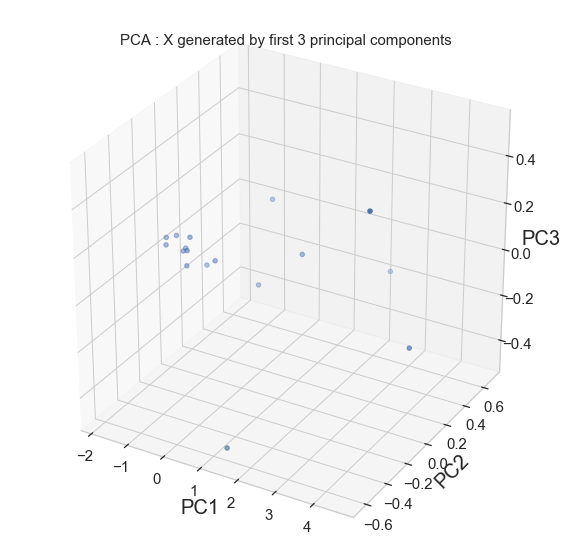

In [26]:
pca_3 = PCA(n_components=3).fit(x_scaled)

X_pca_3 = pca_3.transform(x_scaled)
X_inverse = pca_3.inverse_transform(X_pca_3)


from mpl_toolkits.mplot3d import Axes3D

fig_7 = plt.figure(figsize = (10,10))
ax = fig_7.add_subplot(111, projection='3d')

ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2])

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', rotation = 45, fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.set_title("PCA : X generated by first 3 principal components", fontsize=15)
plt.show()

## 4.15
### (a)

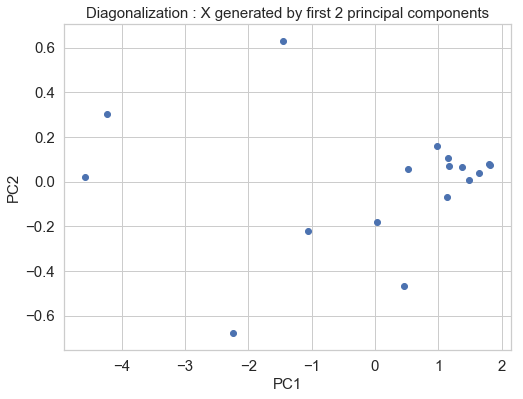

In [27]:
import time
start_diag_2 = time.time()

eigenValues,eigenVectors = np.linalg.eigh(x_scaled.T @ x_scaled)
A = np.flip(eigenVectors,axis = 1)[:,0:2]  #First 2 Principal Eigenvectors

projection = x_scaled @ A

end_diag_2 = time.time()


plt.figure(figsize = (8,6))

plt.scatter(projection.iloc[:,0],projection.iloc[:,1])
plt.title('Diagonalization : X generated by first 2 principal components', fontsize=15)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.show()


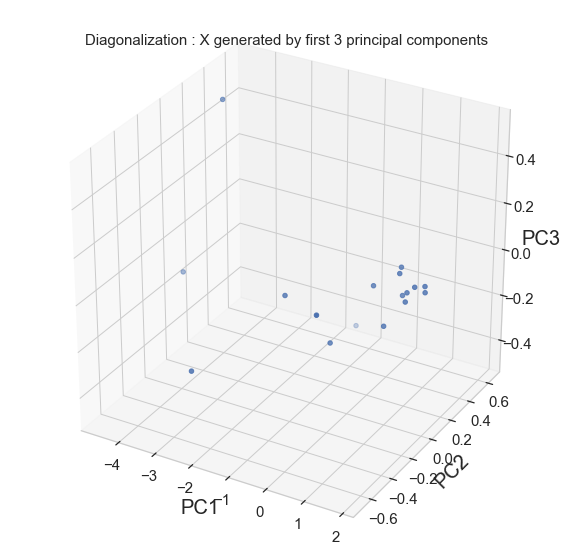

In [28]:
start_diag_3 = time.time()

eigenValues,eigenVectors = np.linalg.eigh(x_scaled.T @ x_scaled)
A = np.flip(eigenVectors,axis = 1)[:,0:3]  #First 3 Principal Eigenvectors

projection = x_scaled @ A

end_diag_3 = time.time()


fig_7 = plt.figure(figsize = (10,10))
ax = fig_7.add_subplot(111, projection='3d')

ax.scatter(projection.iloc[:,0],projection.iloc[:,1],projection.iloc[:,2])

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', rotation = 45, fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.set_title("Diagonalization : X generated by first 3 principal components", fontsize=15)
plt.show()

### (b)

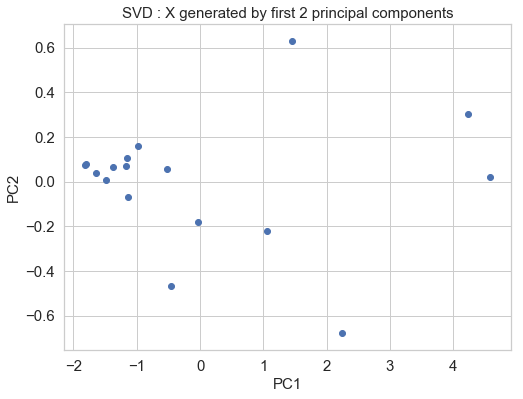

In [29]:
start_svd_2 = time.time()

u,s,v = np.linalg.svd(x_scaled)
singularVectors = v[0:2,:].T

projection = x_scaled @ singularVectors

end_svd_2 = time.time()

plt.figure(figsize = (8,6))

plt.scatter(projection.iloc[:,0],projection.iloc[:,1])
plt.title('SVD : X generated by first 2 principal components', fontsize=15)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.show()

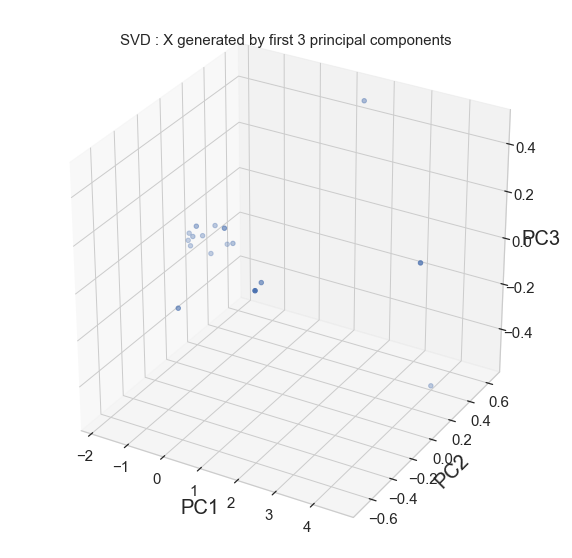

In [30]:
start_svd_3 = time.time()

u,s,v = np.linalg.svd(x_scaled)
singularVectors = v[0:3,:].T

projection = x_scaled @ singularVectors

end_svd_3 = time.time()

fig_7 = plt.figure(figsize = (10,10))
ax = fig_7.add_subplot(111, projection='3d')

ax.scatter(projection.iloc[:,0],projection.iloc[:,1],projection.iloc[:,2])

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', rotation = 45, fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.set_title("SVD : X generated by first 3 principal components", fontsize=15)
plt.show()

We notice that we obtain symmetric results for the 2D and 3D graphs by doing a PCA, a diagonalization of $X^TX$, or by doing an SVD

### (c)

In [31]:
print('With 2 Principal component :')
print('\t∆T diagonalization :', round(end_diag_2 - start_diag_2,6 ))
print('\t∆T svd: ', round(end_svd_2 - start_svd_2, 6))

print('\nWith 3 Principal component :')
print('\t∆T diagonalization : ',round(end_diag_3 - start_diag_3, 6))
print('\t∆T svd : ', round(end_svd_3 - start_svd_3, 6))

With 2 Principal component :
	∆T diagonalization : 0.003219
	∆T svd:  0.003173

With 3 Principal component :
	∆T diagonalization :  0.00277
	∆T svd :  0.001174


In both case, we observe the execution time for the Singular Value Decomposition is usually smaller than for diagonalizing the matrix $X^TX$.

# EXERCISE 5 (Analysis of the auto-mpg Dataset)

## 5.16

In [32]:
# EXTRACT MPG COLUMN NAMES
df_mpg_names = pd.read_csv('auto-mpg.names',skiprows = 32, nrows = 9, header = None)
fields = pd.read_csv('auto-mpg.names',skiprows = 32, nrows = 9, header = None)
fields = fields[0].str.extract(r'. \s*([^\.]*)\s*\:', expand=False)

df_mpg = pd.read_csv('auto-mpg.data-original' , sep=r"\s+", names = fields.T)

print('NaN entries dropped from dataset:', df_mpg.isnull().any(axis=1).sum())
df_mpg = df_mpg.dropna()

NaN entries dropped from dataset: 14


## 5.17

In [33]:
# ENCODE CATEGORICAL ORIGIN DATA
df_mpg = pd.get_dummies(df_mpg, columns=["origin"], prefix=["origin"])
df_mpg = df_mpg.rename(columns={"origin_1.0": "USA", "origin_2.0": "Europe", "origin_3.0": "Japan"})

df_mpg = df_mpg.set_index('car name')
df_mpg = df_mpg.dropna()

df_mpg.head(9)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
car name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0
ford galaxie 500,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1,0,0
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1,0,0
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1,0,0
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1,0,0


## 5.18

In [34]:
# SELECT 9 ROWS OF THE DATASET AT RANDOM
# WE THEN VERIFY THAT NO FEATURE IS CONSTANT THROUGH THE SAMPLED DATASET

np.random.seed(42)
ids = np.arange(df_mpg.shape[0])
np.random.shuffle(ids)
ids = ids[:9]

df_mpg_9 = df_mpg.iloc[ids , :]
display(df_mpg_9)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
car name,,,,,,,,,,
renault 12 (sw),26.0,4.0,96.0,69.0,2189.0,18.0,72.0,0,1,0
saab 99gle,21.6,4.0,121.0,115.0,2795.0,15.7,78.0,0,1,0
honda civic cvcc,36.1,4.0,91.0,60.0,1800.0,16.4,78.0,0,0,1
plymouth cricket,26.0,4.0,91.0,70.0,1955.0,20.5,71.0,1,0,0
ford mustang gl,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1,0,0
toyota corolla,28.0,4.0,97.0,75.0,2155.0,16.4,76.0,0,0,1
ford country squire (sw),13.0,8.0,400.0,170.0,4746.0,12.0,71.0,1,0,0
toyota corolla liftback,26.0,4.0,97.0,75.0,2265.0,18.2,77.0,0,0,1
plymouth valiant custom,19.0,6.0,225.0,95.0,3264.0,16.0,75.0,1,0,0


After inspecting the sample selected using __seed(42)__, we confirm that all origins (USA, Europe, Japan) are represented, and that no observation (cylinder, hp, year, etc.) is constant through the sampled dataset.

In [35]:
# EXTRACT SAMPLED DATASET
X_mpg_9 = df_mpg.iloc[ids , 1:].values
Y_mpg_9 = df_mpg.iloc[ids , 0].values
#
# EXTRACT FULL DATASET
X_mpg_f = df_mpg.iloc[:,1:].values
Y_mpg_f = df_mpg.iloc[:,0].values
#
# DEFINE OBSERVATIONS FOR NEW MPG PREDICTION
X_pred = np.array([6, 225.0, 100.0, 3233.0, 15.4, 117., 1., 0., 0.]).reshape(1,-1)

In [36]:
# DEFINE PIPELINE (SCALING + LINEAR REGRESSION)
pipe_lr = Pipeline([('pre', StandardScaler()) ,
                    ('reg', LinearRegression(fit_intercept=True))])

In [37]:
# FIT LINEAR REGRESSION MODEL TO SAMPLED DATASET
pipe_lr_9 = pipe_lr.fit(X_mpg_9, Y_mpg_9)

# OUTPUT REGRESSION COEFFICIENTS, INTERCEPT, AND PREDICTION VECTOR

print('Estimator:\n', pipe_lr_9.named_steps['reg'].coef_)
print(separator)
print('Intercept:\n', pipe_lr_9.named_steps['reg'].intercept_)
print(separator)
print('Prediction Vector:\n', list(np.round(pipe_lr_9.predict(X_mpg_9),3)))

Estimator:
 [-10.627775  26.622549  -0.869371 -19.594379  -0.124768   2.154367
  -0.726511   0.717213   0.133288]
----------------------------------------------------------------------------------------------------
Intercept:
 24.744444444444436
----------------------------------------------------------------------------------------------------
Prediction Vector:
 [26.0, 21.6, 36.1, 26.0, 27.0, 28.0, 13.0, 26.0, 19.0]


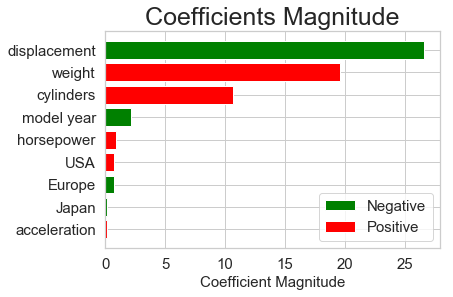

In [38]:
df_coef_9 = pd.DataFrame({'coef' : abs(pipe_lr_9.named_steps['reg'].coef_) , 
                        'sign' : np.sign(pipe_lr_9.named_steps['reg'].coef_)} , 
                        index=df_mpg.columns[1:])

df_coef_9 = df_coef_9.sort_values(['coef'] , 0 , ascending=False)


y_pos = np.arange(len(df_coef_9))
performance = df_coef_9.iloc[:,0].values

fig, ax = plt.subplots()
for i in y_pos:
    if df_coef_9.iloc[i,1] > 0:
        ax.barh(y_pos[i], performance[i], align='center', color='green')
    else:
        ax.barh(y_pos[i], performance[i], align='center', color='red')

ax.set_yticks(y_pos)
ax.set_yticklabels(df_coef_9.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficient Magnitude', fontsize = 15)
ax.set_title('Coefficients Magnitude', fontsize = 25)
ax.legend(['Negative','Positive'], fontsize = 15)

plt.show()

We observe that the weight, the model year and the displacement are variables that strongly describe our data which makes sense. However, the model is fit only on 9 observations. It isn't enough for the model to learn the actual importance of the variables. In this case, the weights are similar to the ones we obtain when we fit the model on our entire table which means our 9 observations are good representation of X.

## 5.19

In [39]:
pipe_lr_f = pipe_lr.fit(X_mpg_f, Y_mpg_f)

lr_estimator = pipe_lr_f.named_steps['reg'].coef_
lr_intercept = pipe_lr_f.named_steps['reg'].intercept_

print('Estimator:\n', np.round(pipe_lr_f.named_steps['reg'].coef_,4))
print('Intercept:\n', pipe_lr_f.named_steps['reg'].intercept_)
#print('Prediction Vector:\n', list(np.round(pipe_lr.predict(X_mpg_f),3)))

Estimator:
 [-0.8343  2.506  -0.699  -5.6925  0.218   2.8587 -0.7515  0.408   0.5218]
Intercept:
 23.44591836734694


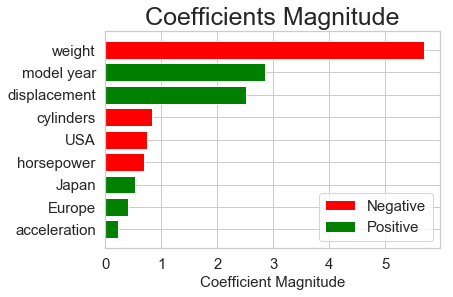

In [40]:
df_coef = pd.DataFrame({'coef' : np.abs(lr_estimator) , 'sign' : np.sign(lr_estimator)} , index=df_mpg.columns[1:])
df_coef = df_coef.sort_values(['coef'] , 0 , ascending=False)

y_pos = np.arange(len(df_coef))
performance = df_coef.iloc[:,0].values

fig, ax = plt.subplots()
for i in y_pos:
    if df_coef.iloc[i,1] > 0:
        ax.barh(y_pos[i], performance[i], align='center', color='green')
    else:
        ax.barh(y_pos[i], performance[i], align='center', color='red')

ax.set_yticks(y_pos)
ax.set_yticklabels(df_coef.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficient Magnitude', fontsize = 15)
ax.set_title('Coefficients Magnitude', fontsize = 25)
ax.legend(['Negative','Positive'], fontsize = 15)

plt.show()

In [41]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


The weight seems to be the variable which best explains gasoline consumption.   
The weight goes from 1613 to 5140 whereas the other columns have much smaller values. Therefore if we hadn't normalized our columns the weight would have been very important but the other variables almost wouldn't have been considered.

## 5.20

In [42]:
xscaled = pipe_lr_f.named_steps['pre'].transform(X_mpg_f)

r_sq = np.linalg.norm( Y_mpg_f - pipe_lr.predict(X_mpg_f) )**2
print('norm squared of residual vector', r_sq)

norm squared of residual vector 4187.391678082952


In [43]:
LHS = np.linalg.norm(Y_mpg_f - Y_mpg_f.mean())**2

RHS = r_sq + np.linalg.norm(pipe_lr_f.predict(X_mpg_f) - Y_mpg_f.mean())**2

print('LHS = RHS:',np.isclose(LHS,RHS))

LHS = RHS: True


## 5.21

In [44]:
print(f'The consumption prediction for this new car is : {np.round(pipe_lr_f.predict(X_pred),3)[0]} mpg.')

The consumption prediction for this new car is : 53.12 mpg.
